# Task 1: Análisis exploratorio de los datos

In [28]:
import os
from pathlib import Path

import pandas as pd
pd.set_option('display.max_columns', None)

import numpy as np
from datetime import datetime

import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

In [29]:
DATA_RAW = Path("../data")

In [30]:
def file_df(path, filename, sep):
        """Method to load HL7 files with the correct separator
        which is |

        Args:
            path ([str]): path to the raw data files
            filename ([str]): name of the txt file to be opened

        Returns:
            [Dataframe]: dataframe created from the file
        """
        return pd.read_csv(Path(path) / filename, sep)

In [31]:
df_train = file_df(DATA_RAW,'j0001_train.csv',',') 
df_test = file_df(DATA_RAW,'j0001_X_test.csv',',') 

In [32]:
# Checking the data type
df_train.dtypes

feature1    float64
feature2    float64
feature3    float64
feature4    float64
target      float64
dtype: object

In [33]:
# Total number of rows and columns
print("shape train dataset: ", df_train.shape)

# Rows containing duplicate data
duplicate_rows_df = df_train[df_train.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)


shape train dataset:  (2100, 5)
number of duplicate rows:  (0, 5)


In [34]:
# Finding the null values.
print(df_train.isnull().sum())

feature1    0
feature2    0
feature3    0
feature4    0
target      0
dtype: int64


<AxesSubplot:>

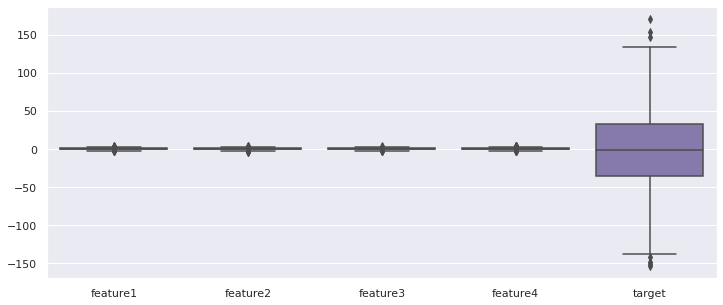

In [56]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df_train)

<AxesSubplot:>

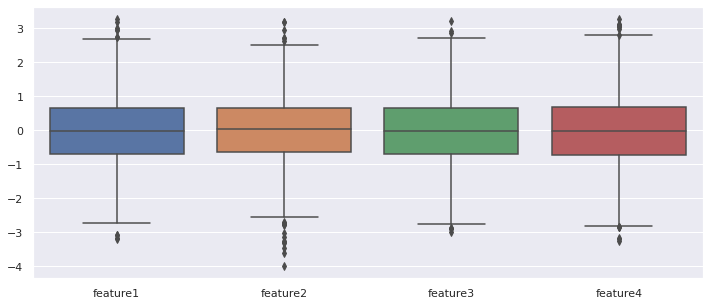

In [60]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df_train.iloc[:, 0:4])

In [63]:
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

feature1     1.376119
feature2     1.302568
feature3     1.378272
feature4     1.407640
target      68.778594
dtype: float64


<AxesSubplot:>

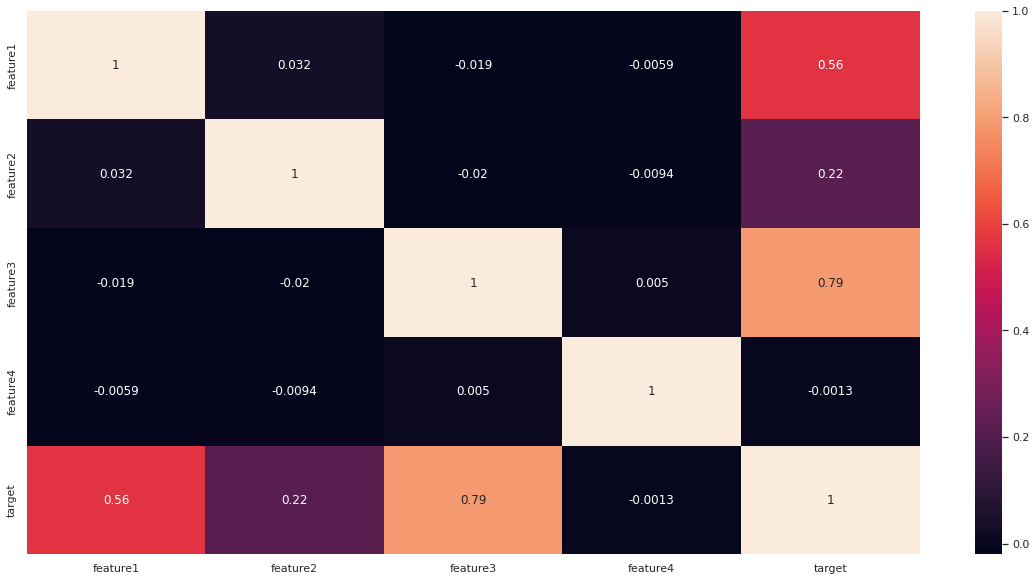

In [66]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= df_train.corr()
sns.heatmap(c,annot=True)


In [74]:
df_num_corr = df_train.corr()['target'][:-1] 
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with target:\n{}".format(len(golden_features_list), golden_features_list))

There is 2 strongly correlated values with target:
feature3    0.786433
feature1    0.563765
Name: target, dtype: float64


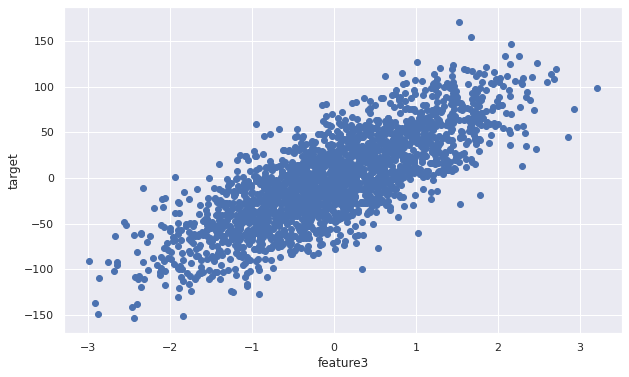

In [69]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_train['feature3'], df_train['target'])
ax.set_xlabel('feature3')
ax.set_ylabel('target')
plt.show()

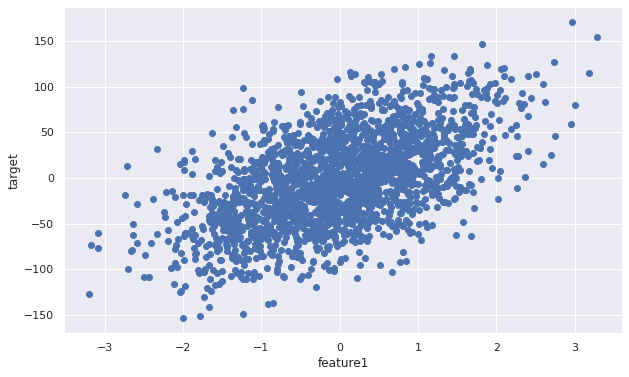

In [70]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df_train['feature1'], df_train['target'])
ax.set_xlabel('feature1')
ax.set_ylabel('target')
plt.show()

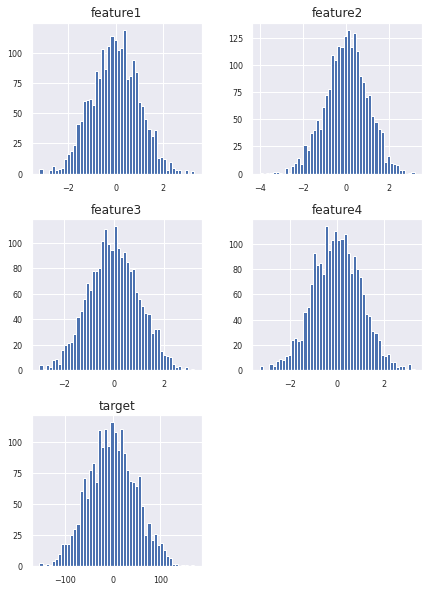

In [78]:
df_train.hist(figsize=(7, 10), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations


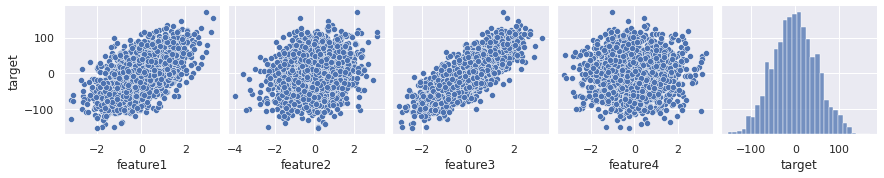

In [76]:
for i in range(0, len(df_train.columns), 5):
    sns.pairplot(data=df_train,
                x_vars=df_train.columns[i:i+5],
                y_vars=['target'])